# Netflix Data Visualization 📽️🍿

# Goal Of Project:

- We want to visualize netflix data in a better way

# Step-by-step Breakdown Of Project:

- Loading data: using pandas

- Cleaning data: handling missing values, removing duplicates and fixing columns

- Understanding data: using head(), tail(), describe() to get surface-level insights about data

- Identifying questions to answer: what do we want to know from data?

- Visualizing data: using matplotlib

- Saving plots: using savefig()

# Questions Being Considered For Data Visualization

- How many movies vs tv shows are there? -> bar chart

- What is percentage of each content rating? -> pie chart

- How has number of releases changed over the years? -> line plot

- What is distribution of movie durations? -> histogram

- Relationship between release year and number of tv shows? -> scatter plot

- Top 10 countries with highest number of tv shows? -> horizontal Bar chart 

- Compare multiple plots together  -> subplots

- Save your plots!

<bound method NDFrame.head of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabal

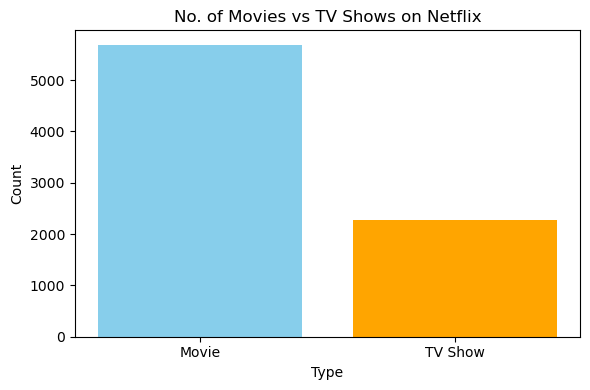

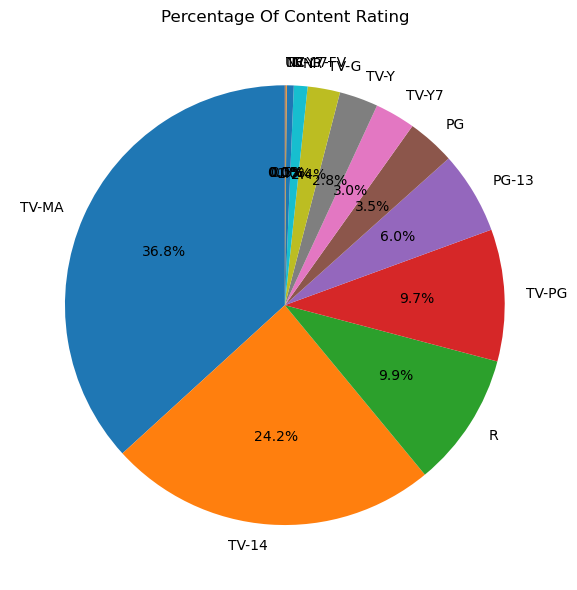

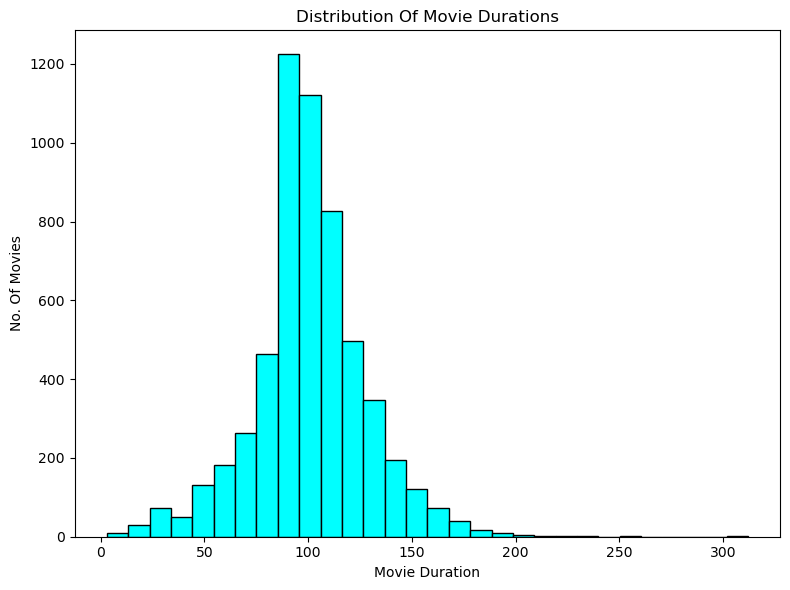

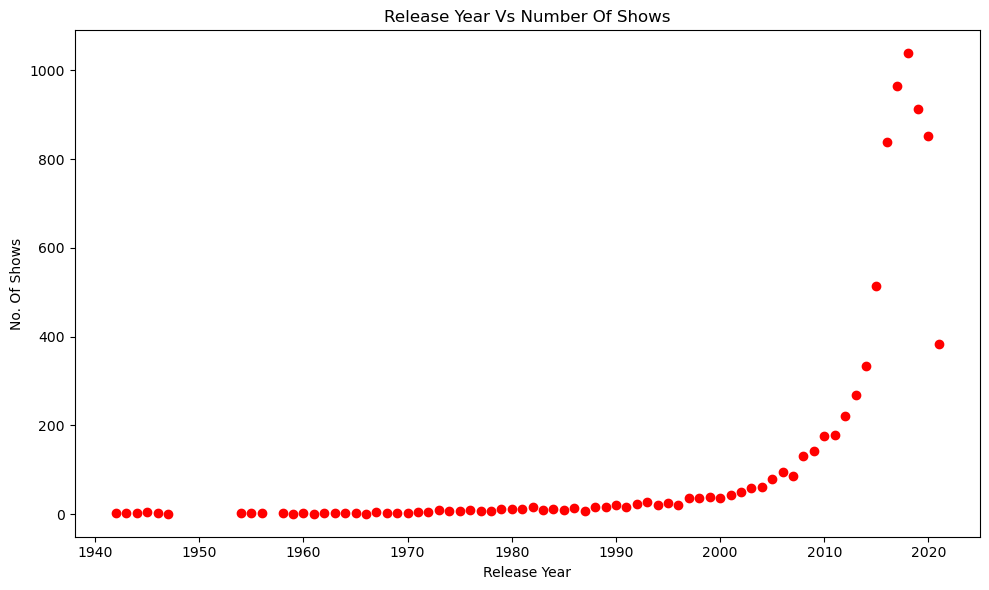

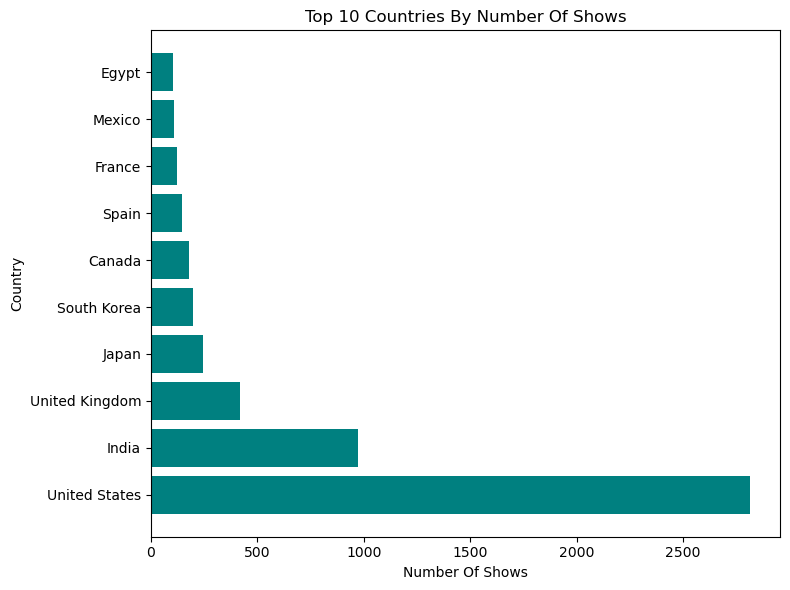

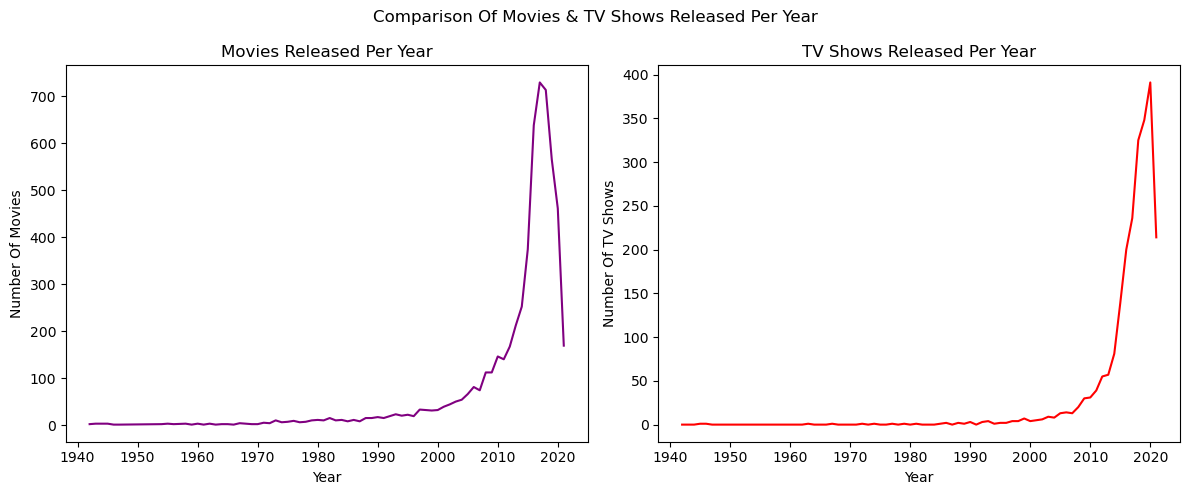

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("netflix_titles.csv")
print(df.head)
df = df.dropna(subset=['show_id', 'type', 'title', 'release_year', 'rating', 'country', 'duration' ])

type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'orange'])
plt.title("No. of Movies vs TV Shows on Netflix")
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()


rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Percentage Of Content Rating")
plt.tight_layout()
plt.savefig('content_ratings_pie.png')
plt.show()


movie_df = df[df['type'] ==  'Movie'].copy()
movie_df['duration'] = movie_df['duration'].str.replace('min', '').astype(int)
plt.figure(figsize=(8,6))
plt.hist(movie_df['duration'], bins=30, color='cyan', edgecolor="black")
plt.title('Distribution Of Movie Durations')
plt.xlabel('Movie Duration')
plt.ylabel('No. Of Movies')
plt.tight_layout()
plt.savefig('movie_duration_histogram.png')
plt.show()


release_counts = df["release_year"].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color="red")
plt.title('Release Year Vs Number Of Shows')
plt.xlabel('Release Year')
plt.ylabel('No. Of Shows')
plt.tight_layout()
plt.savefig('release_year_scatter.png')
plt.show()


countries_counts = df["country"].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(countries_counts.index, countries_counts.values, color="teal")
plt.title('Top 10 Countries By Number Of Shows')
plt.xlabel('Number Of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top_10_countries.png')
plt.show()


content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Movies plot
ax[0].plot(content_by_year.index, content_by_year['Movie'], color="purple")
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number Of Movies')

# TV Shows plot
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color="red")
ax[1].set_title('TV Shows Released Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number Of TV Shows')

fig.suptitle("Comparison Of Movies & TV Shows Released Per Year")
plt.tight_layout()
plt.savefig("movies_tvshows_comparison.png")
plt.show()
